# How is Airbnb affecting the London long-term rental market?

## CASA0013: Foundations of Spatial Data Science

### Student Ids: ucfnanz,  ucfnyni, ucfnfan,

This report examines the impact of Airbnb on the London housing rental market in 2021. As a result of the analysis, different upward and downward movements in the prices of Airbnb listings in London and London housing rentals have been observed in comparison with 2020 based on the pre-existing socioeconomic conditions in each region. Geographically, the distribution of rental prices decreases from central to remote areas. Based on the findings of this study, both the density and price of Airbnb listings influence long-term rental market.

Based on the analysis on this question, we will dive this into three models. Static model for rental price and rental property count in year 2021, and another change model with data changing from 2020 to 2021.

# Data processing

## Import packages

In [1]:
import geopandas
import pandas as pd
import os.path
from shapely import wkt
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import make_axes_locatable

import requests
import zipfile
import io

In [2]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import seaborn as sn
import statsmodels

## Read and transform raw data

### Read geo data

Read the London borough shapefile.

In [3]:
url = 'https://data.london.gov.uk/download/statistical-gis-boundary-files-london/9ba8c833-6370-4b11-abdc-314aa020d5e0/statistical-gis-boundaries-london.zip'
local_path = 'tmp/'
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print("Done")
z.extractall(path=local_path) # extract to folder
filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)

Done
['statistical-gis-boundaries-london/ESRI/LSOA_2004_London_Low_Resolution.dbf', 'statistical-gis-boundaries-london/ESRI/LSOA_2004_London_Low_Resolution.prj', 'statistical-gis-boundaries-london/ESRI/LSOA_2004_London_Low_Resolution.shp', 'statistical-gis-boundaries-london/ESRI/LSOA_2004_London_Low_Resolution.shx', 'statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.dbf', 'statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.prj', 'statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp', 'statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shx', 'statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.dbf', 'statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.prj', 'statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp', 'statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shx', 'statistical-gis-boundaries-london/ESRI/London_Ward.dbf', 'statistical-gis-boundaries-london/ESRI/

In [4]:
london_borough_shp = geopandas.read_file(os.path.join('tmp',
                                                      'statistical-gis-boundaries-london',
                                                      'ESRI',
                                                      'London_Borough_Excluding_MHW.shp'))


### Read airbnb data for both 2020 and 2021

In [5]:
#Airbnb 2021 data
airbnb_points2021 = pd.read_csv('https://orca.casa.ucl.ac.uk/~jreades/data/London-2021-10-listings.csv.gz',
                                compression='gzip',
                                error_bad_lines=False)
#remove NA values
airbnb_points2021 = airbnb_points2021[airbnb_points2021["longitude"].notna()]
airbnb_points2021 = airbnb_points2021[airbnb_points2021["latitude"].notna()]

#Airbnb 2020 data
airbnb_points2020 = pd.read_csv('https://orca.casa.ucl.ac.uk/~jreades/data/London-2020-11-listings.csv.gz',
                                compression='gzip',
                                error_bad_lines=False)
#remove NA values
airbnb_points2020 = airbnb_points2020[airbnb_points2020["longitude"].notna()]
airbnb_points2020 = airbnb_points2020[airbnb_points2020["latitude"].notna()]

/tmp/ipykernel_17007/1460592921.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  airbnb_points2021 = pd.read_csv('https://orca.casa.ucl.ac.uk/~jreades/data/London-2021-10-listings.csv.gz',
/tmp/ipykernel_17007/1460592921.py:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  airbnb_points2020 = pd.read_csv('https://orca.casa.ucl.ac.uk/~jreades/data/London-2020-11-listings.csv.gz',


### Convert Airbnb point data to shp

In [6]:
#converting 2021 data
geometry_airbnb = geopandas.points_from_xy(airbnb_points2021.longitude, airbnb_points2021.latitude)
geo_airbnb_points2021 = geopandas.GeoDataFrame(airbnb_points2021, geometry = geometry_airbnb)
geo_airbnb_points2021.set_crs(epsg = 4326,inplace= True)
geo_airbnb_points2021.to_crs(epsg = 27700,inplace= True)

#converting 2020 data
geometry_airbnb = geopandas.points_from_xy(airbnb_points2020.longitude, airbnb_points2020.latitude)
geo_airbnb_points2020 = geopandas.GeoDataFrame(airbnb_points2020, geometry = geometry_airbnb)
geo_airbnb_points2020.set_crs(epsg = 4326,inplace= True)
geo_airbnb_points2020.to_crs(epsg = 27700,inplace= True)

### Check the airbnb point map

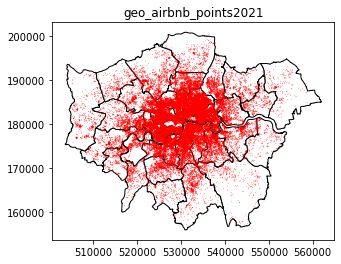

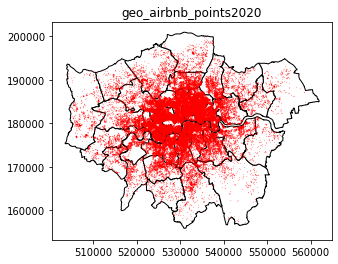

In [7]:
# showing 2021 Airbnb listing
base = london_borough_shp.plot(color='white', edgecolor='black')
geo_airbnb_points2021.plot(ax=base, marker='o', color='red', markersize=.01)
plt.title("geo_airbnb_points2021")
plt.show()

# showing 2020 Airbnb listing
base = london_borough_shp.plot(color='white', edgecolor='black')
geo_airbnb_points2020.plot(ax=base, marker='o', color='red', markersize=.01)
plt.title("geo_airbnb_points2020")
plt.show()

## Spatial join

In [8]:
## Join 2021 Airbnb points with London borough shp
geo_airbnb_points2021_london_borough = geopandas.sjoin(geo_airbnb_points2021,london_borough_shp)

## Join 2020 Airbnb points with London borough shp
geo_airbnb_points2020_london_borough = geopandas.sjoin(geo_airbnb_points2020,london_borough_shp)

/tmp/ipykernel_17007/464710584.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...

  geo_airbnb_points2021_london_borough = geopandas.sjoin(geo_airbnb_points2021,london_borough_shp)
/tmp/ipykernel_17007/464710584.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...

  geo_airbnb_points2020_london_borough = geopandas.sjoin(geo_airbnb_points2020,london_borough_shp)


# Data cleaning

## Converting columns

### Cleaning 2021 data

In [9]:
df_airbnb_points_borough = pd.DataFrame(geo_airbnb_points2021_london_borough)

df_airbnb_points_borough["price"] = df_airbnb_points_borough["price"].str.replace(",","")
df_airbnb_points_borough["price"] = pd.to_numeric(df_airbnb_points_borough["price"].str.replace("$",""))

/tmp/ipykernel_17007/4060909803.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_airbnb_points_borough["price"] = pd.to_numeric(df_airbnb_points_borough["price"].str.replace("$",""))


#### Calculating values for research.

In [10]:
# calculate bedroom value
average_bedroom_value = df_airbnb_points_borough.groupby("NAME")["bedrooms"].mean().rename('bedrooms_mean').to_frame()
median_bedroom_value = df_airbnb_points_borough.groupby("NAME")["bedrooms"].median().rename('bedrooms_mediann').to_frame()    

# calculate bed value
average_bed_value = df_airbnb_points_borough.groupby("NAME")["beds"].mean().rename('beds_mean').to_frame()
median_bed_value = df_airbnb_points_borough.groupby("NAME")["beds"].median().rename('beds_median').to_frame()

# calculate price value
average_price_value = df_airbnb_points_borough.groupby("NAME")["price"].mean().rename('price_mean').to_frame()
median_price_value = df_airbnb_points_borough.groupby("NAME")["price"].median().rename('price_median').to_frame()  

# calculate accommodates value
average_accommodates_value = df_airbnb_points_borough.groupby("NAME")["accommodates"].mean().rename('accommodates_mean').to_frame()
median_accommodates_value = df_airbnb_points_borough.groupby("NAME")["accommodates"].median().rename('accommodates_median').to_frame()

#### Transform dataframe from long to wide.

In [11]:
# generate dictionary
borough_name_dict = {}

# generate area code list
borough_name_list = df_airbnb_points_borough['NAME'].drop_duplicates().dropna().to_list()
property_type_list = df_airbnb_points_borough['property_type'].drop_duplicates().dropna().to_list()
room_type_list = df_airbnb_points_borough['room_type'].drop_duplicates().dropna().to_list()

# generate loop
for borogh_name in borough_name_list:
    data = df_airbnb_points_borough.loc[df_airbnb_points_borough["NAME"] == borogh_name]
      
    # total count listing based on borogh_name
    total_count_listing = len(data)
    
    # generaate different dict
    borough_name_dict[borogh_name] = {"property_type" : {}, "room_type" : {}, "amenities" : 0, "total_count" : total_count_listing}
    # print(borogh_name, len(data)) # check every code has how many records
    for property in property_type_list:
        borough_name_dict[borogh_name]["property_type"][property] = 0
    data_property_type = data.loc[:,"property_type"]  # select the name of all property_type
    
    for property_final in data_property_type:
        borough_name_dict[borogh_name]["property_type"][property_final] += 1 

    # generate the room_type
    for room in room_type_list:
        borough_name_dict[borogh_name]["room_type"][room] = 0
    data_room_type = data.loc[:,"room_type"]  # select the name of all property_type
    for room_final in data_room_type:
        borough_name_dict[borogh_name]["room_type"][room_final] += 1 
    
   
    data_amenities = data.loc[:,"amenities"] 
    longtime_allowed = data_amenities.str.count("Long term stays allowed")
    # print(len(data),postcode,longtime_allowed)
    
    total_longtime_allowed_value = 0
    
    for long_time in longtime_allowed:
        if long_time > 0 :
            total_longtime_allowed_value += 1
    
    borough_name_dict[borogh_name]["amenities"] = total_longtime_allowed_value

#### Store the results

In [12]:
# generate the csv
sample_borogh_name_dict = borough_name_dict[borough_name_list[0]]
property_type_title = []
for key, value in sample_borogh_name_dict["property_type"].items():
    property_type_title.append(key)
    
room_type_title = []
for key, value in sample_borogh_name_dict["room_type"].items():
    room_type_title.append(key)

columes_intial = []
columes_intial.append("NAME") 
columes_intial.extend(property_type_title)
columes_intial.extend(room_type_title)    
columes_intial.append("long_term_stays_allowed")     
columes_intial.append("total_count_listing")

result_list = []

for borogh_name in borough_name_list:
    result = [borogh_name]
    for key, value in borough_name_dict[borogh_name]["property_type"].items():
        result.append(value)
    for key, value in borough_name_dict[borogh_name]["room_type"].items():
        result.append(value)
    result.append(borough_name_dict[borogh_name]["amenities"])
    result.append(borough_name_dict[borogh_name]["total_count"])
    
    result_list.append(result)
  
result = pd.DataFrame(result_list, columns = columes_intial)

### Cleaning 2020 data

In [13]:
df_airbnb_points_borough = pd.DataFrame(geo_airbnb_points2020_london_borough)

df_airbnb_points_borough["price"] = df_airbnb_points_borough["price"].str.replace(",","")
df_airbnb_points_borough["price"] = pd.to_numeric(df_airbnb_points_borough["price"].str.replace("$",""))

/tmp/ipykernel_17007/686295331.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_airbnb_points_borough["price"] = pd.to_numeric(df_airbnb_points_borough["price"].str.replace("$",""))


#### Calculating values for research.

In [14]:
# calculate bedroom value
average_bedroom_value = df_airbnb_points_borough.groupby("NAME")["bedrooms"].mean().rename('bedrooms_mean').to_frame()
median_bedroom_value = df_airbnb_points_borough.groupby("NAME")["bedrooms"].median().rename('bedrooms_mediann').to_frame()    

# calculate bed value
average_bed_value = df_airbnb_points_borough.groupby("NAME")["beds"].mean().rename('beds_mean').to_frame()
median_bed_value = df_airbnb_points_borough.groupby("NAME")["beds"].median().rename('beds_median').to_frame()

# calculate price value
average_price_value = df_airbnb_points_borough.groupby("NAME")["price"].mean().rename('price_mean').to_frame()
median_price_value = df_airbnb_points_borough.groupby("NAME")["price"].median().rename('price_median').to_frame()  

# calculate accommodates value
average_accommodates_value = df_airbnb_points_borough.groupby("NAME")["accommodates"].mean().rename('accommodates_mean').to_frame()
median_accommodates_value = df_airbnb_points_borough.groupby("NAME")["accommodates"].median().rename('accommodates_median').to_frame()

#### Transform dataframe from long to wide.

In [15]:
# generate dictionary
borough_name_dict = {}

# generate area code list
borough_name_list = df_airbnb_points_borough['NAME'].drop_duplicates().dropna().to_list()
property_type_list = df_airbnb_points_borough['property_type'].drop_duplicates().dropna().to_list()
room_type_list = df_airbnb_points_borough['room_type'].drop_duplicates().dropna().to_list()

In [16]:
# generate loop
for borogh_name in borough_name_list:
    data = df_airbnb_points_borough.loc[df_airbnb_points_borough["NAME"] == borogh_name]
      
    # total count listing based on borogh_name
    total_count_listing = len(data)
    
    # generaate different dict
    borough_name_dict[borogh_name] = {"property_type" : {}, "room_type" : {}, "amenities" : 0, "total_count" : total_count_listing}
    # print(borogh_name, len(data)) # check every code has how many records
    for property in property_type_list:
        borough_name_dict[borogh_name]["property_type"][property] = 0
    data_property_type = data.loc[:,"property_type"]  # select the name of all property_type
    
    for property_final in data_property_type:
        borough_name_dict[borogh_name]["property_type"][property_final] += 1 

    # generate the room_type
    for room in room_type_list:
        borough_name_dict[borogh_name]["room_type"][room] = 0
    data_room_type = data.loc[:,"room_type"]  # select the name of all property_type
    for room_final in data_room_type:
        borough_name_dict[borogh_name]["room_type"][room_final] += 1 
    
   
    data_amenities = data.loc[:,"amenities"] 
    longtime_allowed = data_amenities.str.count("Long term stays allowed")
    
    total_longtime_allowed_value = 0
    
    for long_time in longtime_allowed:
        if long_time > 0 :
            total_longtime_allowed_value += 1
    
    borough_name_dict[borogh_name]["amenities"] = total_longtime_allowed_value


In [17]:
# generate the csv
sample_borogh_name_dict = borough_name_dict[borough_name_list[0]]
property_type_title = []
for key, value in sample_borogh_name_dict["property_type"].items():
    property_type_title.append(key)
    
room_type_title = []
for key, value in sample_borogh_name_dict["room_type"].items():
    room_type_title.append(key)

columes_intial = []
columes_intial.append("NAME") 
columes_intial.extend(property_type_title)
columes_intial.extend(room_type_title)    
columes_intial.append("long_term_stays_allowed")     
columes_intial.append("total_count_listing")

In [18]:
result_list = []

for borogh_name in borough_name_list:
    result = [borogh_name]
    for key, value in borough_name_dict[borogh_name]["property_type"].items():
        result.append(value)
    for key, value in borough_name_dict[borogh_name]["room_type"].items():
        result.append(value)
    result.append(borough_name_dict[borogh_name]["amenities"])
    result.append(borough_name_dict[borogh_name]["total_count"])
    
    result_list.append(result)
  
result = pd.DataFrame(result_list, columns = columes_intial)

## Add IMD score into df

In [19]:
# Add for 2021
london_borough_shp["area"] = london_borough_shp['geometry'].area/ 10**6   ## km2
borough_area = london_borough_shp

result_test1 = result.merge(average_bedroom_value, on = "NAME")
result_test1 = result_test1.merge(median_bedroom_value, on = "NAME")
result_test1 = result_test1.merge(average_bed_value, on = "NAME")
result_test1 = result_test1.merge(median_bed_value, on = "NAME")
result_test1 = result_test1.merge(average_price_value, on = "NAME")
result_test1 = result_test1.merge(median_price_value, on = "NAME")
result_test1 = result_test1.merge(average_accommodates_value, on = "NAME")
result_test1 = result_test1.merge(median_accommodates_value, on = "NAME")
result_test1 = result_test1.merge(borough_area, on = "NAME")

rent_imd_data1 = pd.read_csv("https://raw.githubusercontent.com/yuxinnie/FSDS-Reproducible-Analysis/main/rent_and_other_data2021.csv")
link_airbnb_rent_imd_data1 = result_test1.merge(rent_imd_data1, left_on = "NAME", right_on= "borough_name")
link_airbnb_rent_imd_data1.columns

Index(['NAME', 'Entire apartment', 'Private room in house',
       'Private room in townhouse', 'Private room in apartment',
       'Entire serviced apartment', 'Entire townhouse', 'Entire house',
       'Entire condominium', 'Private room in condominium',
       ...
       'SUB_2009', 'SUB_2006', 'geometry', 'area', 'borough_name',
       'rental_total_price2020', 'total_rental_count2020',
       'rent_price_mean_one_room2020', 'rential_price_one_poroperty2020',
       'housing_affordability2021'],
      dtype='object', length=121)

In [20]:
# Add for 2020
result_test0 = result.merge(average_bedroom_value, on = "NAME")
result_test0 = result_test0.merge(median_bedroom_value, on = "NAME")
result_test0 = result_test0.merge(average_bed_value, on = "NAME")
result_test0 = result_test0.merge(median_bed_value, on = "NAME")
result_test0 = result_test0.merge(average_price_value, on = "NAME")
result_test0 = result_test0.merge(median_price_value, on = "NAME")
result_test0 = result_test0.merge(average_accommodates_value, on = "NAME")
result_test0 = result_test0.merge(median_accommodates_value, on = "NAME")
result_test0 = result_test0.merge(borough_area, on = "NAME")
result_test0["density_total_airbnb_count_listing2020"] = result_test0["total_count_listing"]/result_test0["area"]

rent_imd_data0 = pd.read_csv("https://raw.githubusercontent.com/yuxinnie/FSDS-Reproducible-Analysis/main/rent_and_other_data2020.csv")
link_airbnb_rent_imd_data0 = result_test0.merge(rent_imd_data0, left_on = "NAME", right_on= "borough_name")
link_airbnb_rent_imd_data0.columns

Index(['NAME', 'Entire apartment', 'Private room in house',
       'Private room in townhouse', 'Private room in apartment',
       'Entire serviced apartment', 'Entire townhouse', 'Entire house',
       'Entire condominium', 'Private room in condominium',
       ...
       'geometry', 'area', 'density_total_airbnb_count_listing2020',
       'borough_name', 'rental_total_price2020', 'total_rental_count2020',
       'rent_price_mean_one_room2020', 'rential_price_one_poroperty2020',
       'IMD - Average score2019', 'housing_affordability2020'],
      dtype='object', length=123)

# Data plotting

In [21]:
## read in data for plotting and model 2.
change_raw = pd.read_csv('https://raw.githubusercontent.com/yuxinnie/FSDS-Reproducible-Analysis/main/change_data2020-2021.csv')

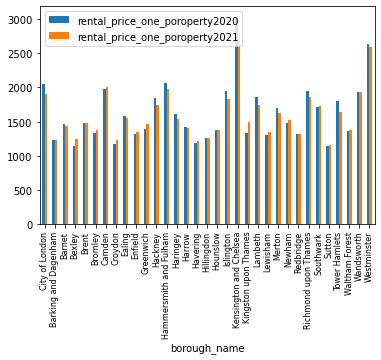

In [22]:
##plot 1
change_raw.plot(x='borough_name', y=['rental_price_one_poroperty2020', 'rental_price_one_poroperty2021'], kind='bar')
plt.xticks(change_raw.index, change_raw['borough_name'], rotation=90, fontsize=8)
plt.savefig("rental price of one property", dpi=300, bbox_inches = "tight") #,transparent=True

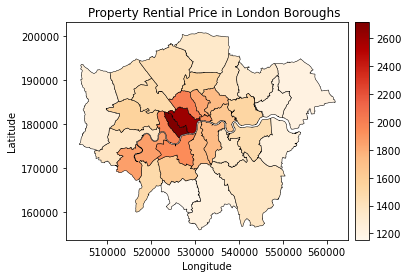

In [23]:
rental_one_property_price = pd.read_csv("https://raw.githubusercontent.com/yuxinnie/FSDS-Reproducible-Analysis/main/picture_data.csv")

# Merge the two dataframes on 'NAME'
london_borough_shp = london_borough_shp.merge(rental_one_property_price, on='NAME')

### plot
# Plot the map
fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
london_borough_shp.plot(column='rential_price_one_poroperty2021', ax=ax, legend=True, cax=cax, cmap='OrRd',edgecolor='black',linewidth = 0.5 )
ax.set_xlabel("Longitude") 
ax.set_ylabel("Latitude")

# Add title and axis labels
plt.title("Property Rential Price in London Boroughs", x=-10)


plt.show()


# Data analysis

## Model 1: static model for year 2021.

- This is a model based on 33 London boroughs. 
- Predict variable: rental market PROPERTY price (mean price in 2021).
- X variables: (X1-4: Airbnb variables; X5-6: covariance variables)
    - X1: Airbnb room price. 
    - X2: Airbnb lisiting price. 
    - X3: Airbnb listing count. 
    - X4: Airbnb listing density.
    - X5: IMD (Index of multiple deprivation) score. 
    - X6: Housing affordability.

### Read in data and select variables for analysing.

In [24]:
raw = pd.read_csv('https://raw.githubusercontent.com/yuxinnie/FSDS-Reproducible-Analysis/main/change_rentinfo_airbnb_link_crime_cencus_borough.csv')

In [25]:
colnames = list(raw.columns)

In [26]:
rent = raw[[
'rental_price_one_poroperty', #Y variable: rental market PROPERTY price.
    
'airbnb_room_price_mean',#X1: airbnb room price MEAN
'price_mean',             #X2: airbnb lisiting price MEAN 
'total_count_listing',    #X3:  airbnb listing count 
'density_total_count_listing', #X4:airbnb listing density (BOROUGH)
'long_term_stays_allowed', #X5: long-term rent
'IMD - Average score ',#X6: IMD score 
'ratio_house_price_earnings_residencebased2021'#X7: Housing affordability
]]

In [27]:
rent.head(8)

,rental_price_one_poroperty,airbnb_room_price_mean,price_mean,total_count_listing,density_total_count_listing,long_term_stays_allowed,IMD - Average score,ratio_house_price_earnings_residencebased2021
0,1229,33.070909,72.875312,401,11.11,330,32.8,10.17
1,1437,39.035167,130.208519,1573,18.13,1295,16.1,16.1
2,1239,31.233933,66.356890,283,4.67,239,16.3,10.51
3,1478,44.378651,125.802852,2034,47.05,1659,25.6,15.97
4,1369,36.209476,78.947748,555,3.70,430,14.2,12.14
5,2002,63.778938,148.002035,4914,225.52,4315,20.1,19.13
6,1903,110.893671,233.869318,352,121.22,319,14.7,na
7,1236,34.574883,66.705660,1060,12.26,853,22.5,11.42


### Check the type of data and NA values.

In [28]:
rent.isna().sum()

rental_price_one_poroperty                       0
airbnb_room_price_mean                           0
price_mean                                       0
total_count_listing                              0
density_total_count_listing                      0
long_term_stays_allowed                          0
IMD - Average score                              0
ratio_house_price_earnings_residencebased2021    0
dtype: int64

In [29]:
rent.dtypes

rental_price_one_poroperty                         int64
airbnb_room_price_mean                           float64
price_mean                                       float64
total_count_listing                                int64
density_total_count_listing                      float64
long_term_stays_allowed                            int64
IMD - Average score                              float64
ratio_house_price_earnings_residencebased2021     object
dtype: object

In [30]:
rent = rent.drop(6,axis = 0)

In [31]:
rent['ratio_house_price_earnings_residencebased2021'] = rent['ratio_house_price_earnings_residencebased2021'].astype(float)

In [32]:
rent.columns

Index(['rental_price_one_poroperty', 'airbnb_room_price_mean', 'price_mean',
       'total_count_listing', 'density_total_count_listing',
       'long_term_stays_allowed', 'IMD - Average score ',
       'ratio_house_price_earnings_residencebased2021'],
      dtype='object')

### Check outliers.

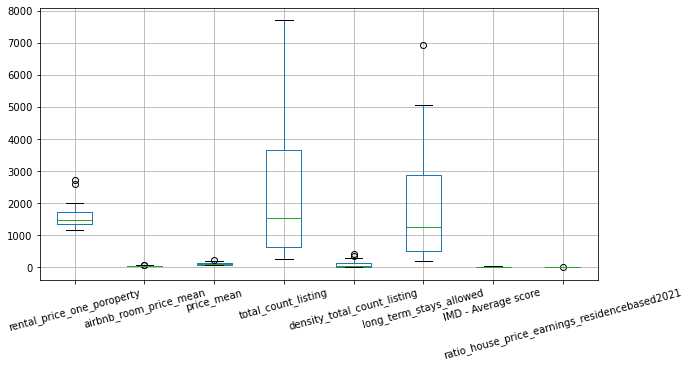

In [33]:
fig = plt.figure(figsize =(10, 5))
 
# Creating plot
boxplot = rent.boxplot(column=[ 'rental_price_one_poroperty', 'airbnb_room_price_mean', 'price_mean',
       'total_count_listing', 'density_total_count_listing',
       'long_term_stays_allowed', 'IMD - Average score ',
       'ratio_house_price_earnings_residencebased2021'],rot=15, fontsize=10)  
 
# show plot
plt.show()

<AxesSubplot:xlabel='ratio_house_price_earnings_residencebased2021', ylabel='rental_price_one_poroperty'>

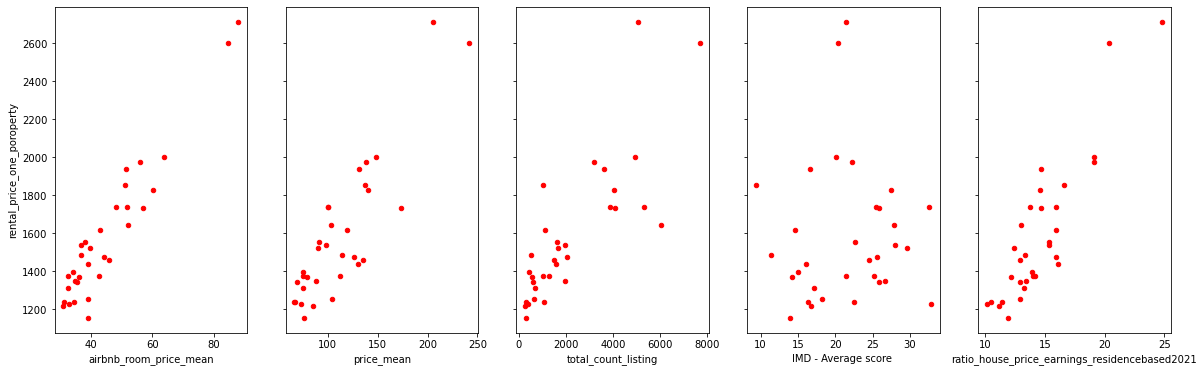

In [34]:
# make scatterplot for x and y variable.
fig, axs = plt.subplots(1, 5, sharey=True) 
rent.plot(kind='scatter', x='airbnb_room_price_mean', y='rental_price_one_poroperty',  c = 'r',ax=axs[0], figsize=(20, 6))
rent.plot(kind='scatter', x='price_mean', y='rental_price_one_poroperty', c = 'r', ax=axs[1])
rent.plot(kind='scatter', x='total_count_listing', y='rental_price_one_poroperty',  c = 'r',ax=axs[2])
rent.plot(kind='scatter', x='IMD - Average score ', y='rental_price_one_poroperty',  c = 'r',ax=axs[3])
rent.plot(kind='scatter', x='ratio_house_price_earnings_residencebased2021', y='rental_price_one_poroperty',  c = 'r',ax=axs[4])

There are two max points which seem like outliers.

In [35]:
rent['rental_price_one_poroperty'].sort_values(ascending = False).head(2)

19    2715
32    2602
Name: rental_price_one_poroperty, dtype: int64

In this case, delete data No.19 and No.32

In [36]:
rent_new = rent.drop([19,32])

<AxesSubplot:xlabel='ratio_house_price_earnings_residencebased2021', ylabel='rental_price_one_poroperty'>

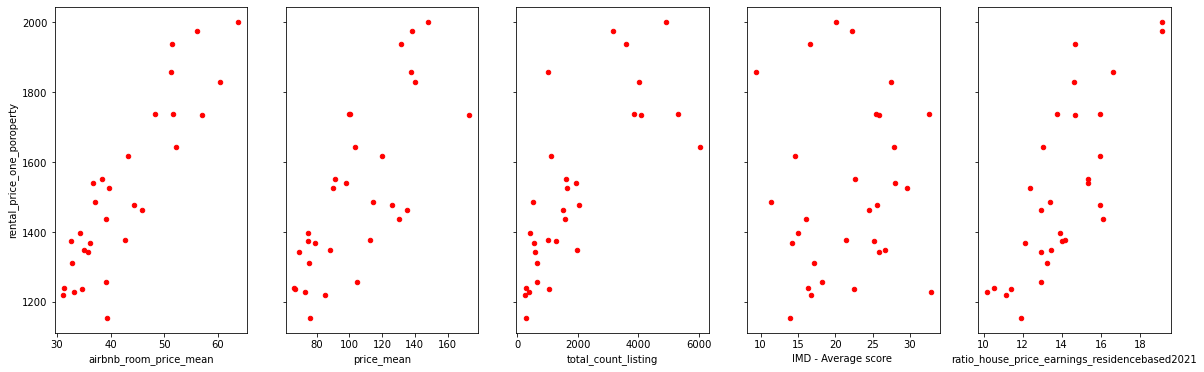

In [37]:
# check again after dropping outliers.
fig, axs = plt.subplots(1, 5, sharey=True) 
rent_new.plot(kind='scatter', x='airbnb_room_price_mean', y='rental_price_one_poroperty',  c = 'r',ax=axs[0], figsize=(20, 6))
rent_new.plot(kind='scatter', x='price_mean', y='rental_price_one_poroperty', c = 'r', ax=axs[1])
rent_new.plot(kind='scatter', x='total_count_listing', y='rental_price_one_poroperty',  c = 'r',ax=axs[2])
rent_new.plot(kind='scatter', x='IMD - Average score ', y='rental_price_one_poroperty',  c = 'r',ax=axs[3])
rent_new.plot(kind='scatter', x='ratio_house_price_earnings_residencebased2021', y='rental_price_one_poroperty',  c = 'r',ax=axs[4])

### Check the distributions of data.

In [38]:
import seaborn as sns

#### Display altogether.

To make sure if data has to be standardased, or normalised

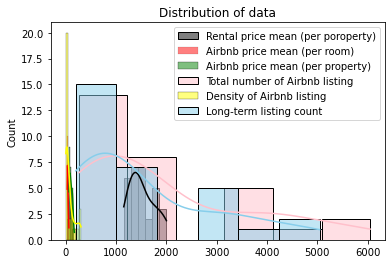

In [39]:
sns.histplot(rent_new, x='rental_price_one_poroperty', color="black", label='Rental price mean (per poroperty)', kde=True)

sns.histplot(rent_new, x='airbnb_room_price_mean', color="red", label='Airbnb price mean (per room)', kde=True)
sns.histplot(rent_new, x='price_mean', color="green", label='Airbnb price mean (per property)', kde=True)
sns.histplot(rent_new, x='total_count_listing', color="pink", label='Total number of Airbnb listing', kde=True)
sns.histplot(rent_new, x='density_total_count_listing', color="yellow", label='Density of Airbnb listing', kde=True)
sns.histplot(rent_new, x='long_term_stays_allowed', color="skyblue", label='Long-term listing count', kde=True)

# plt.rcParams['figure.dpi'] = 300

plt.title("Distribution of data")
plt.xlabel(' ')
plt.legend() 
plt.show()
# plt.savefig('distribution of variables.png')

To know about distributions of every variable. To help decide which technique of standardasation should be applied.

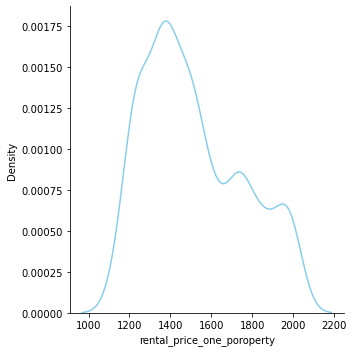

In [92]:
sns.displot(rent_new, x='rental_price_one_poroperty', color="skyblue", label='rental_price_one_poroperty', kind="kde", bw_adjust=.5)

# sns.displot(rent_new, x='airbnb_room_price_mean', color="red", label='airbnb_room_price_mean', kind="kde", bw_adjust=.5)
# sns.displot(rent_new, x='price_mean', color="red", label='price_mean', kind="kde", bw_adjust=.5)
# sns.displot(rent_new, x='total_count_listing', color="red", label='total_count_listing', kind="kde", bw_adjust=.5)
# sns.displot(rent_new, x='density_total_count_listing', color="red", label='density_total_count_listing', kind="kde", bw_adjust=.5)
# sns.displot(rent_new, x='IMD - Average score ', color="red", label='IMD - Average score ', kind="kde", bw_adjust=.5)
# sns.displot(rent_new, x='ratio_house_price_earnings_residencebased2021', color="red", label='ratio_house_price_earnings_residencebased2021', kind="kde", bw_adjust=.5)

### Standardisation

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
nrmlzd = MinMaxScaler()
data_std =nrmlzd.fit_transform(rent_new)

In [43]:
data_std= pd.DataFrame(data_std, 
                       index=rent_new.index,
                       columns=rent_new.columns)
data_std.tail()

,rental_price_one_poroperty,airbnb_room_price_mean,price_mean,total_count_listing,density_total_count_listing,long_term_stays_allowed,IMD - Average score,ratio_house_price_earnings_residencebased2021
27,0.685142,0.791135,1.000000,0.662753,0.459962,0.638258,0.700855,0.503348
28,0.000000,0.247054,0.090121,0.006044,0.014493,0.007016,0.196581,0.196429
29,0.577830,0.641399,0.346649,1.000000,1.000000,1.000000,0.790598,0.319196
30,0.260613,0.043930,0.081456,0.177690,0.101716,0.159100,0.675214,0.426339
31,0.924528,0.623036,0.607879,0.578311,0.339240,0.541684,0.307692,0.501116


### Model building: static model

#### Model with non-standardised data

In [44]:
model1 = rent_new[[
'rental_price_one_poroperty', #Y variable: rental market room price.
    
'airbnb_room_price_mean',#X1: airbnb room price MEAN
'price_mean',             #X2: airbnb lisiting price MEAN 
'total_count_listing',    #X3:  airbnb listing count 
'density_total_count_listing', #X4:airbnb listing density (BOROUGH)
'long_term_stays_allowed', #X5: long-term rent
'IMD - Average score ',#X6: IMD score 
'ratio_house_price_earnings_residencebased2021'#X7: Housing affordability
]]

Text(0.5, 1.0, 'Correlation Matrix')

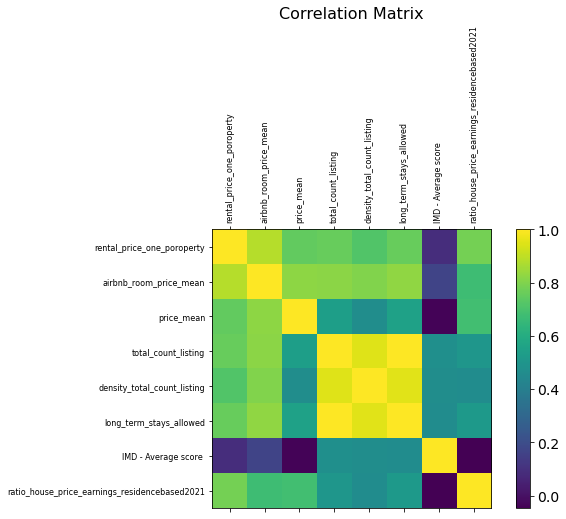

In [90]:
df = model1
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(9, 5))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [46]:
#Using VIF to deal with multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    while True:
        df_with_const = add_constant(df)
        
        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
        
        vif_df = vif_df.drop('const')
        
        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break

    return df

In [47]:
#Building and interpreting a linear regression model
df_predictors_selected_VIF = drop_column_using_vif_(model1.drop('rental_price_one_poroperty', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: long_term_stays_allowed
Dropping: density_total_count_listing
Dropping: airbnb_room_price_mean
The columns remaining after VIF selection are:
Index(['price_mean', 'total_count_listing', 'IMD - Average score ',
       'ratio_house_price_earnings_residencebased2021'],
      dtype='object')


In [48]:
model_rent = sm.OLS(endog=model1[['rental_price_one_poroperty']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_rent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     rental_price_one_poroperty   R-squared:                       0.829
Model:                                    OLS   Adj. R-squared:                  0.801
Method:                         Least Squares   F-statistic:                     30.26
Date:                        Tue, 17 Jan 2023   Prob (F-statistic):           2.98e-09
Time:                                00:36:59   Log-Likelihood:                -180.46
No. Observations:                          30   AIC:                             370.9
Df Residuals:                              25   BIC:                             377.9
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                           710.2354    190.551      3.727      0.001     317.789    1102.682
price_mean                                        1.7475      1.051      1.663      0.109      -0.417       3.912
total_count_listing                               0.0764      0.019      4.104      0.000       0.038       0.115
IMD - Average score                              -5.1854      4.065     -1.276      0.214     -13.557       3.186
ratio_house_price_earnings_residencebased2021    41.8387     13.261      3.155      0.004      14.528      69.150
==============================================================================
Omnibus:                        0.158   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.368
Skew:                           0.077   Prob(JB):                        0.832
Kurtosis:                       2.480   Cond. No.                     2.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Residual analysis

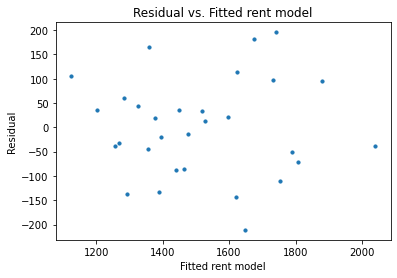

In [49]:
size = 10
plt.scatter(model_rent.fittedvalues, model_rent.resid , size)
plt.xlabel('Fitted rent model')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted rent model')
plt.show()

#### Model with standardised data

In [50]:
model1_std = data_std[[
'rental_price_one_poroperty', #Y variable: rental market room price.
    
'airbnb_room_price_mean',#X1: airbnb room price MEAN
'price_mean',             #X2: airbnb lisiting price MEAN 
'total_count_listing',    #X3:  airbnb listing count 
'density_total_count_listing', #X4:airbnb listing density (BOROUGH)
'long_term_stays_allowed', #X5: long-term rent
'IMD - Average score ',#X6: IMD score 
'ratio_house_price_earnings_residencebased2021'#X7: Housing affordability
]]

Text(0.5, 1.0, 'Correlation Matrix')

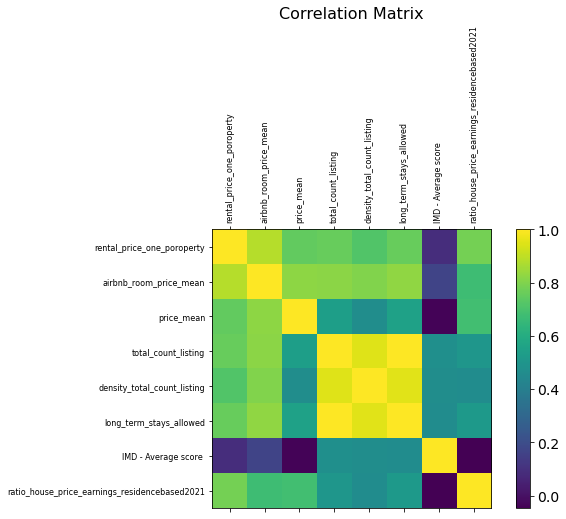

In [89]:
df = model1_std
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(9, 5))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [52]:
#Building and interpreting a linear regression model
df_predictors_selected_VIF = drop_column_using_vif_(model1_std.drop('rental_price_one_poroperty', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: long_term_stays_allowed
Dropping: density_total_count_listing
Dropping: airbnb_room_price_mean
The columns remaining after VIF selection are:
Index(['price_mean', 'total_count_listing', 'IMD - Average score ',
       'ratio_house_price_earnings_residencebased2021'],
      dtype='object')


In [53]:
model_rent_std = sm.OLS(endog=model1_std[['rental_price_one_poroperty']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_rent_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     rental_price_one_poroperty   R-squared:                       0.829
Model:                                    OLS   Adj. R-squared:                  0.801
Method:                         Least Squares   F-statistic:                     30.26
Date:                        Tue, 17 Jan 2023   Prob (F-statistic):           2.98e-09
Time:                                00:36:59   Log-Likelihood:                 21.825
No. Observations:                          30   AIC:                            -33.65
Df Residuals:                              25   BIC:                            -26.64
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.0810      0.076      1.060      0.299      -0.076       0.239
price_mean                                        0.2201      0.132      1.663      0.109      -0.053       0.493
total_count_listing                               0.5215      0.127      4.104      0.000       0.260       0.783
IMD - Average score                              -0.1431      0.112     -1.276      0.214      -0.374       0.088
ratio_house_price_earnings_residencebased2021     0.4421      0.140      3.155      0.004       0.154       0.731
==============================================================================
Omnibus:                        0.158   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.368
Skew:                           0.077   Prob(JB):                        0.832
Kurtosis:                       2.480   Cond. No.                         9.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 2: change model for data change between 2020 and 2021

In [54]:
# change_raw = pd.read_csv('https://raw.githubusercontent.com/yuxinnie/FSDS-Reproducible-Analysis/main/change_data2020-2021.csv')

In [55]:
rent_change = change_raw[[    
'change_rental_price_one_poroperty2020_2021', #Y variable: rental market PROPERTY price change.
    
'change_airbnb_room_price_mean2020_2021',#X1: change in airbnb room price
'change_airbnb_price_mean2020_2021',  #X2: change in airbnb lisiting price
'change_total_airbnb_count_listing2020_2021',    #X3: change in airbnb listing count 
'change_density_total_count_listing2020_2021', #X4:airbnb listing density (BOROUGH)
'IMD - Average score2019',#X5: IMD score 
]]



In [56]:
rent_change.columns

Index(['change_rental_price_one_poroperty2020_2021',
       'change_airbnb_room_price_mean2020_2021',
       'change_airbnb_price_mean2020_2021',
       'change_total_airbnb_count_listing2020_2021',
       'change_density_total_count_listing2020_2021',
       'IMD - Average score2019'],
      dtype='object')

In [57]:
rent_change.head(8)

,change_rental_price_one_poroperty2020_2021,change_airbnb_room_price_mean2020_2021,change_airbnb_price_mean2020_2021,change_total_airbnb_count_listing2020_2021,change_density_total_count_listing2020_2021,IMD - Average score2019
0,-147.00,-38.07,-62.44,-96,-33.05,14.7
1,7.36,1.33,6.54,-4,-0.11,32.8
2,-33.26,29.84,45.87,-70,-0.81,16.1
3,103.14,3.51,7.12,10,0.16,16.3
4,-7.52,18.41,31.46,-304,-7.03,25.6
5,34.78,3.09,8.16,-24,-0.16,14.2
6,23.97,17.77,24.29,-344,-15.79,20.1
7,68.89,6.10,9.00,-49,-0.56,22.5


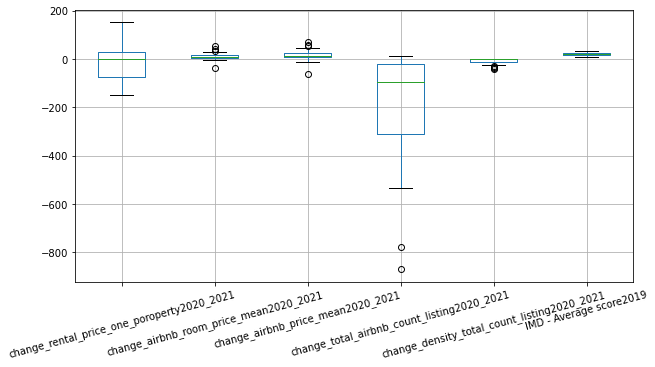

In [83]:
fig = plt.figure(figsize =(10, 5))
 
# Creating plot
boxplot = rent_change.boxplot(column=['change_rental_price_one_poroperty2020_2021',                                      
       'change_airbnb_room_price_mean2020_2021',
       'change_airbnb_price_mean2020_2021',
       'change_total_airbnb_count_listing2020_2021',
       'change_density_total_count_listing2020_2021',
       'IMD - Average score2019'],rot=15, fontsize=10)  
 
# show plot
plt.show()

<AxesSubplot:xlabel='IMD - Average score2019', ylabel='change_rental_price_one_poroperty2020_2021'>

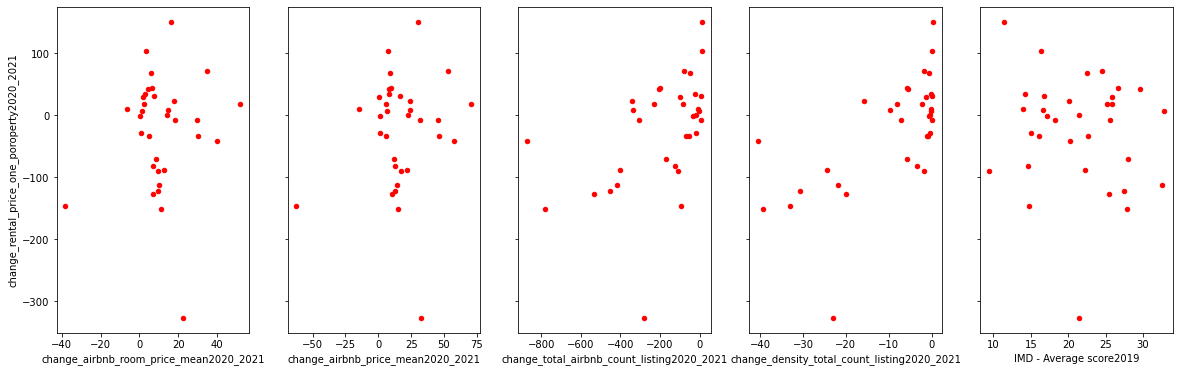

In [59]:
fig, axs = plt.subplots(1, 5, sharey=True) 
rent_change.plot(kind='scatter', x='change_airbnb_room_price_mean2020_2021', y='change_rental_price_one_poroperty2020_2021',  c = 'r',ax=axs[0], figsize=(20, 6))
rent_change.plot(kind='scatter', x='change_airbnb_price_mean2020_2021', y='change_rental_price_one_poroperty2020_2021', c = 'r', ax=axs[1])
rent_change.plot(kind='scatter', x='change_total_airbnb_count_listing2020_2021', y='change_rental_price_one_poroperty2020_2021',  c = 'r',ax=axs[2])
rent_change.plot(kind='scatter', x='change_density_total_count_listing2020_2021', y='change_rental_price_one_poroperty2020_2021',  c = 'r',ax=axs[3])
rent_change.plot(kind='scatter', x='IMD - Average score2019', y='change_rental_price_one_poroperty2020_2021',  c = 'r',ax=axs[4])

The min point should be removed.

In [60]:
rent_change['change_rental_price_one_poroperty2020_2021'].sort_values(ascending = True).head(2)

19   -327.05
29   -151.36
Name: change_rental_price_one_poroperty2020_2021, dtype: float64

In this case, delete data No.19

In [61]:
rent_change = rent_change.drop(19)

<AxesSubplot:xlabel='IMD - Average score2019', ylabel='change_rental_price_one_poroperty2020_2021'>

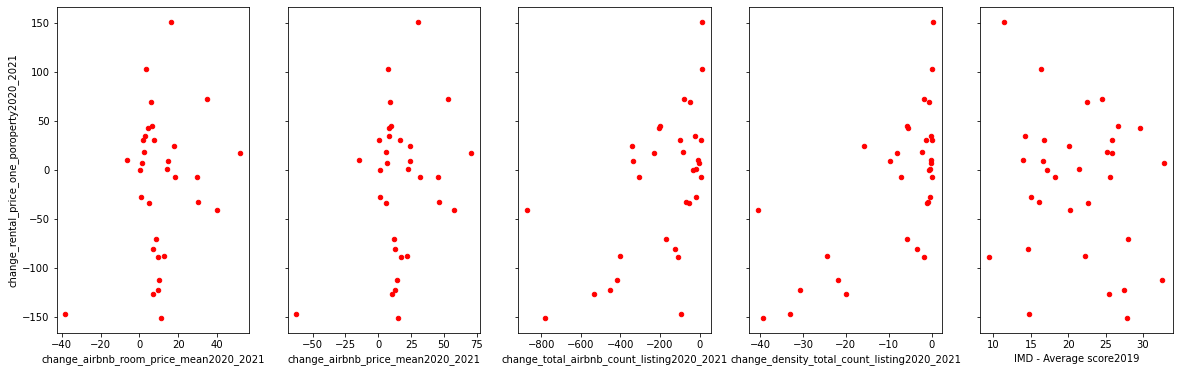

In [62]:
fig, axs = plt.subplots(1, 5, sharey=True) 
rent_change.plot(kind='scatter', x='change_airbnb_room_price_mean2020_2021', y='change_rental_price_one_poroperty2020_2021',  c = 'r',ax=axs[0], figsize=(20, 6))
rent_change.plot(kind='scatter', x='change_airbnb_price_mean2020_2021', y='change_rental_price_one_poroperty2020_2021', c = 'r', ax=axs[1])
rent_change.plot(kind='scatter', x='change_total_airbnb_count_listing2020_2021', y='change_rental_price_one_poroperty2020_2021',  c = 'r',ax=axs[2])
rent_change.plot(kind='scatter', x='change_density_total_count_listing2020_2021', y='change_rental_price_one_poroperty2020_2021',  c = 'r',ax=axs[3])
rent_change.plot(kind='scatter', x='IMD - Average score2019', y='change_rental_price_one_poroperty2020_2021',  c = 'r',ax=axs[4])

### Check the distributions of data.

To make sure if data has to be standardased, or normalised in which way.

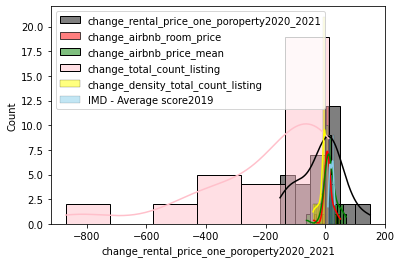

In [63]:
sns.histplot(rent_change, x='change_rental_price_one_poroperty2020_2021', color="black", label='change_rental_price_one_poroperty2020_2021', kde=True)

sns.histplot(rent_change, x='change_airbnb_room_price_mean2020_2021', color="red", label='change_airbnb_room_price', kde=True)
sns.histplot(rent_change, x='change_airbnb_price_mean2020_2021', color="green", label='change_airbnb_price_mean', kde=True)
sns.histplot(rent_change, x='change_total_airbnb_count_listing2020_2021', color="pink", label='change_total_count_listing', kde=True)
sns.histplot(rent_change, x='change_density_total_count_listing2020_2021', color="yellow", label='change_density_total_count_listing', kde=True)
sns.histplot(rent_change, x='IMD - Average score2019', color="skyblue", label='IMD - Average score2019', kde=True)

plt.legend() 
plt.show()

In [64]:
nrmlzd = MinMaxScaler()
data_std_change =nrmlzd.fit_transform(rent_change)

In [65]:
data_std_change= pd.DataFrame(data_std_change, 
                       index=rent_change.index,
                       columns=rent_change.columns)
data_std_change.head()

,change_rental_price_one_poroperty2020_2021,change_airbnb_room_price_mean2020_2021,change_airbnb_price_mean2020_2021,change_total_airbnb_count_listing2020_2021,change_density_total_count_listing2020_2021,IMD - Average score2019
0,0.014399,0.000000,0.000000,0.877690,0.183264,0.226496
1,0.524192,0.438411,0.518179,0.981880,0.989234,1.000000
2,0.390039,0.755647,0.813627,0.907135,0.972107,0.286325
3,0.840517,0.462668,0.522536,0.997735,0.995840,0.294872
4,0.475049,0.628463,0.705379,0.642129,0.819917,0.692308


### Model building: change model

#### Model with non-standardised data

In [66]:
change = rent_change[[
'change_rental_price_one_poroperty2020_2021',
       'change_airbnb_room_price_mean2020_2021',
       'change_airbnb_price_mean2020_2021',
       'change_total_airbnb_count_listing2020_2021',
       'change_density_total_count_listing2020_2021',
       'IMD - Average score2019'
]]

Text(0.5, 1.0, 'Correlation Matrix')

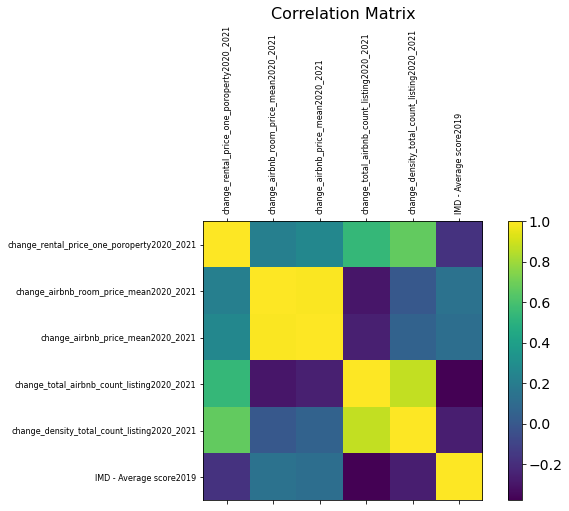

In [88]:
df = change
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(9, 5))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [68]:
#Building and interpreting a linear regression model
df_predictors_selected_VIF = drop_column_using_vif_(change.drop('change_rental_price_one_poroperty2020_2021', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: change_airbnb_price_mean2020_2021
Dropping: change_total_airbnb_count_listing2020_2021
The columns remaining after VIF selection are:
Index(['change_airbnb_room_price_mean2020_2021',
       'change_density_total_count_listing2020_2021',
       'IMD - Average score2019'],
      dtype='object')


In [69]:
model_rent = sm.OLS(endog=change[['change_rental_price_one_poroperty2020_2021']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_rent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     change_rental_price_one_poroperty2020_2021   R-squared:                       0.494
Model:                                                    OLS   Adj. R-squared:                  0.440
Method:                                         Least Squares   F-statistic:                     9.112
Date:                                        Tue, 17 Jan 2023   Prob (F-statistic):           0.000227
Time:                                                00:37:02   Log-Likelihood:                -171.28
No. Observations:                                          32   AIC:                             350.6
Df Residuals:                                              28   BIC:                             356.4
Df Model:                                                   3                                         
Covariance Type:                                    nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          15.9027     35.280      0.451      0.656     -56.365      88.171
change_airbnb_room_price_mean2020_2021          1.0268      0.643      1.598      0.121      -0.289       2.343
change_density_total_count_listing2020_2021     3.8723      0.818      4.735      0.000       2.197       5.547
IMD - Average score2019                        -0.3583      1.665     -0.215      0.831      -3.768       3.052
==============================================================================
Omnibus:                        0.146   Durbin-Watson:                   2.487
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.223
Skew:                           0.142   Prob(JB):                        0.895
Kurtosis:                       2.706   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model with standardised data

In [70]:
change_std = data_std_change[[
'change_rental_price_one_poroperty2020_2021',
       'change_airbnb_room_price_mean2020_2021',
       'change_airbnb_price_mean2020_2021',
       'change_total_airbnb_count_listing2020_2021',
       'change_density_total_count_listing2020_2021',
       'IMD - Average score2019'
]]

Text(0.5, 1.0, 'Correlation Matrix')

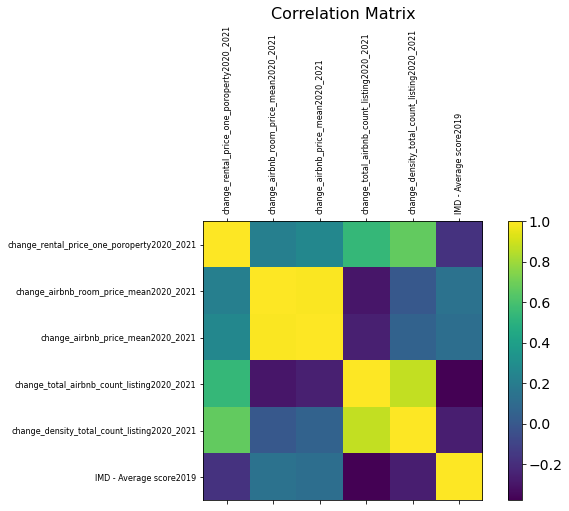

In [87]:
df = change_std
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(9, 5))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [72]:
#Building and interpreting a linear regression model
df_predictors_selected_VIF = drop_column_using_vif_(change_std.drop('change_rental_price_one_poroperty2020_2021', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: change_airbnb_price_mean2020_2021
Dropping: change_total_airbnb_count_listing2020_2021
The columns remaining after VIF selection are:
Index(['change_airbnb_room_price_mean2020_2021',
       'change_density_total_count_listing2020_2021',
       'IMD - Average score2019'],
      dtype='object')


In [73]:
model_rent = sm.OLS(endog=change_std[['change_rental_price_one_poroperty2020_2021']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_rent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     change_rental_price_one_poroperty2020_2021   R-squared:                       0.494
Model:                                                    OLS   Adj. R-squared:                  0.440
Method:                                         Least Squares   F-statistic:                     9.112
Date:                                        Tue, 17 Jan 2023   Prob (F-statistic):           0.000227
Time:                                                00:37:03   Log-Likelihood:                 11.533
No. Observations:                                          32   AIC:                            -15.07
Df Residuals:                                              28   BIC:                            -9.204
Df Model:                                                   3                                         
Covariance Type:                                    nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -0.1063      0.154     -0.691      0.495      -0.421       0.209
change_airbnb_room_price_mean2020_2021          0.3048      0.191      1.598      0.121      -0.086       0.695
change_density_total_count_listing2020_2021     0.5227      0.110      4.735      0.000       0.297       0.749
IMD - Average score2019                        -0.0277      0.129     -0.215      0.831      -0.291       0.236
==============================================================================
Omnibus:                        0.146   Durbin-Watson:                   2.487
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.223
Skew:                           0.142   Prob(JB):                        0.895
Kurtosis:                       2.706   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

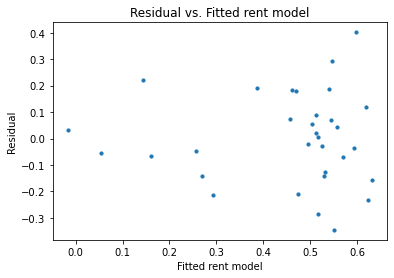

In [74]:
size = 10
plt.scatter(model_rent.fittedvalues, model_rent.resid , size)
plt.xlabel('Fitted rent model')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted rent model')
plt.show()

## Model 3 : Does Airbnb impact on the number of rental property?

In [75]:
model3 = raw[[
'total_rental_count', #Y3 variable: number of rental market PROPERTY
    
'airbnb_room_price_mean',#X1: airbnb room price MEAN
'price_mean',             #X2: airbnb lisiting price MEAN 
'total_count_listing',    #X3:  airbnb listing count 
'density_total_count_listing', #X4:airbnb listing density (BOROUGH)
'long_term_stays_allowed', #X5: long-term rent
'IMD - Average score ',#X6: IMD score 
    'ratio_house_price_earnings_residencebased2021'
]]

In [76]:
model3.dtypes

total_rental_count                                 int64
airbnb_room_price_mean                           float64
price_mean                                       float64
total_count_listing                                int64
density_total_count_listing                      float64
long_term_stays_allowed                            int64
IMD - Average score                              float64
ratio_house_price_earnings_residencebased2021     object
dtype: object

In [77]:
model3= model3.drop(6)

In [78]:
model3['ratio_house_price_earnings_residencebased2021'] = model3['ratio_house_price_earnings_residencebased2021'].astype(float)

Text(0.5, 1.0, 'Correlation Matrix')

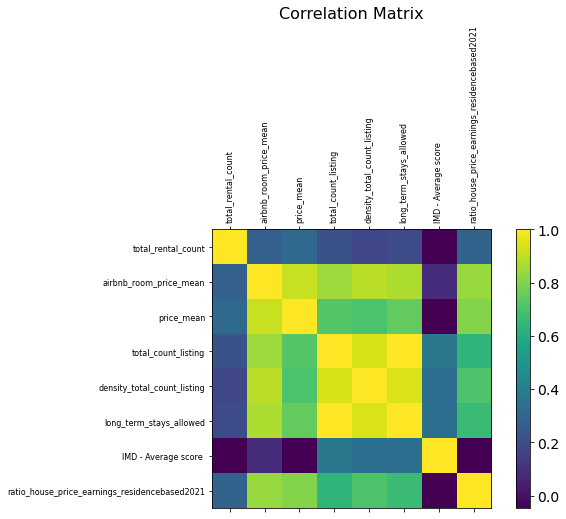

In [91]:
df = model3
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(9, 5))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=8, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [80]:
model3.isna().sum()

total_rental_count                               0
airbnb_room_price_mean                           0
price_mean                                       0
total_count_listing                              0
density_total_count_listing                      0
long_term_stays_allowed                          0
IMD - Average score                              0
ratio_house_price_earnings_residencebased2021    0
dtype: int64

In [81]:
#Building and interpreting a linear regression model
df_predictors_selected_VIF = drop_column_using_vif_(model3.drop('total_rental_count', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

Dropping: long_term_stays_allowed
Dropping: airbnb_room_price_mean
Dropping: density_total_count_listing
The columns remaining after VIF selection are:
Index(['price_mean', 'total_count_listing', 'IMD - Average score ',
       'ratio_house_price_earnings_residencebased2021'],
      dtype='object')


In [82]:
model_rent = sm.OLS(endog=model3[['total_rental_count']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_rent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_rental_count   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.7600
Date:                Tue, 17 Jan 2023   Prob (F-statistic):              0.560
Time:                        00:37:03   Log-Likelihood:                -247.29
No. Observations:                  32   AIC:                             504.6
Df Residuals:                      27   BIC:                             511.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          1230.6327    880.644      1.397      0.174    -576.300    3037.565
price_mean                                        3.4075      5.301      0.643      0.526      -7.470      14.285
total_count_listing                              -0.0038      0.098     -0.039      0.969      -0.205       0.197
IMD - Average score                              -2.6182     21.919     -0.119      0.906     -47.591      42.355
ratio_house_price_earnings_residencebased2021    20.2152     60.857      0.332      0.742    -104.653     145.083
==============================================================================
Omnibus:                        0.460   Durbin-Watson:                   2.791
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.576
Skew:                          -0.035   Prob(JB):                        0.750
Kurtosis:                       2.346   Cond. No.                     2.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""